# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
Today I will be investigating and analyzing the contents of the “No-show appointments” dataset. The dataset provides identifiers for patients and their appointments in the columns PatientID and AppointmentID.  We are also given basic demographic information about the patient in the Age, Gender, and Scholarship columns, as well as more specific medical information in the "Hipertension", Diabetes, Alcoholism, and Handcap columns. Finally, we are also given information more specific to the appointment, such as its location in the Neighbourhood column, when the appointment was made and the actual appointment day in ScheduledDay and AppointmentDay columns, whether an SMS was received or not from the patient in the column SMS_received, and ultimately whether or not the patient no showed in the column No-show.  

### Question(s) for Analysis

Using the dataset, I will explore and analyze the relationship between alcoholism, diabetes, hypertension, and the rate of no-shows from adult patients. Specifically, I will be focusing on answering the questions of "What medical condition, if any, appears to result in the highest rate of no-shows with adult patients", "For any given medical condition, does the patient having additional conditions on top of that lead to a significant change in the rate of no-showing to the appointment", and "Does having more medical conditions appear to correlate with a higher or lower rate of no-shows from adult patients?"


<a id='wrangling'></a>
# Data Wrangling

### General Properties

We'll start by importing the required packages.

In [1]:
#import pandas & numpy for data analysis, pyplot for plotting, seaborn for stylizing visualizations
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')  #set a darker background for plot viewability

%matplotlib inline 


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


We can now load the dataset and perform some basic operations/methods to inspect what will need to be trimmed, altered or cleaned later. After each operation, I will be making small notes of what I would like to change, and compile these later in the section before performing any trimming or cleaning.

In [3]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')  # Load the dataset

In [4]:
df.head()  # Take a quick look at how the the data is presented/recorded in the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


There are some misspellings, the data would be easier to work with if it were all lowercase, and most columns are unnecessary and will need to be dropped. We'll handle this after the rest of our initial inspection.

Next, we'll check for any unusual datatypes

In [5]:
df.dtypes  # Check the datatypes of each column

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Although there isn't anything *wrong* with no-show being recorded as a string of yes or no, it might be easier to use for analysis later if we converted it to an integer, 0 representing "no" and 1 representing "yes".

Next, we'll check for missing values

In [6]:
df.info() # Check the number of total entries and entries for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Thankfully, the RangeIndex shows 110527 rows, and all columns have exactly that amount of entries.

Next, we'll check for duplicate rows, which would need to be dropped.

In [7]:
sum(df.duplicated()) #check how many rows are duplicates of each other

0

No rows have been entered in as duplicates.


We'll now check the number of different unique values each column has.

In [8]:
df.nunique()  #check if any column has an unusual number of unique values

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

To give us more perspective on the statistics of these values, we'll turn to the describe() method below.

In [9]:
df.describe() #use describe() to return statistics on values for each column

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


nunique() and describe() have shown us two unusual aspects of the data: 

* age has a minimum value of -1.
* handicap (or "handcap") has 5 unique values as opposed to the other medical conditions' 2 values. 

Before we trim or alter anything about our data, we'll examine the rows with a recorded age of -1, as well as take a closer look at the distribution of handcap. 

In [10]:
#Let's start with the age discrepancy.

df.query('Age == -1') #return the rows with an age of -1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Only one row shows the age anomaly. Since our research questions focus on the no-show rate of legal adults, we'll be creating a new dataframe that only includes patients ages 18 and over, a step that will automatically "drop" or exclude this row anyway, so no further action needs to be taken.

Next, we'll look a closer look at the handicap values by grouping them up. We won't be using handicap for our analysis later, but this will ensure that there aren't any rows with strange handicap values, which may have to be dropped depending on severity and prevalence.

In [11]:
df.groupby('Handcap').count() #view how many rows each value of handcap is recorded in

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
Handcap,,,,,,,,,,,,,
0,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286
1,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042
2,183,183,183,183,183,183,183,183,183,183,183,183,183
3,13,13,13,13,13,13,13,13,13,13,13,13,13
4,3,3,3,3,3,3,3,3,3,3,3,3,3


The descending relationship between handicap rating and the counts of that rating in the dataset suggests that handicap has been recorded on a scale of severity.  Although we are not provided enough information to determine how these values were assigned, we do not need to be concerned about wrangling or cleaning this aspect of the dataset, as we'll be dropping it anyway.


### Data Cleaning

Now that we've finished inspecting the data, here is an overview of what will be trimmed or altered in the remainder of this section to make the dataset more useful and easier to interpret for analysis later:

* Since our analysis focuses on adult patients, we'll recreate the dataframe to only include patients of ages 18 and over.
* The columns we won't use will be dropped, leaving only: Hipertension, Diabetes, Alcoholism, No-show.
* Spelling corrections: No-show should be No_show, Hipertension should be Hypertension.
* For simplicity's sake, all column names should be changed to lowercase.
* No-show should be converted to an integer, 1 representing Yes and 0 representing No


First, we'll cut out all entries for patients under the age of 18 by recreating the dataframe to include only rows with a recorded age of 18 and over.

In [12]:
df = df.query('Age >= 18')  #recreate df using only rows where age is 18 or higher

df['Age'].min()  #check that the minimum value of age is now 18

18

Since we no longer need the Age column, we'll drop all columns that will not be used in our analysis.

In [13]:
#drop Age, PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Neighbourhood, Scholarship, Handcap, SMS_received columns

df.drop(['Age','PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Neighbourhood','Scholarship','Handcap','SMS_received'],axis=1,inplace=True)

df.head(0) #check that the only remaining columns are Hipertension, Diabetes, Alcoholism, No-show

,Hipertension,Diabetes,Alcoholism,No-show


Next, we'll make spelling corrections and make the column names lowercase:

In [14]:
df.rename(columns={'No-show':'No_show','Hipertension':'Hypertension'},inplace=True) #correct the spellings

df.rename(columns=lambda x: x.strip().lower(),inplace=True) #change all coloumn names to lowercase

df.head(0) #check that the spellings are correct and columns are all lowercase

,hypertension,diabetes,alcoholism,no_show


The unnecessary columns have been dropped, and the columns are now spelled correctly and in all lowercase for easy reference.

Now we'll convert no_show's Yes and No values to 1 and 0, respectively.

In [15]:
df['no_show'].replace(('Yes','No'),(1,0),inplace=True) #replace Yes and No with 1 and 0

In [16]:
df['no_show'] = df['no_show'].astype(int) #convert no_show's datatype to integer

Now that no_show's conversion is complete, we can use describe() again and it should now include the statistics of the number of no-shows to appointments

In [17]:
df.describe()

,hypertension,diabetes,alcoholism,no_show
count,83147.000000,83147.000000,83147.000000,83147.000000
mean,0.261741,0.094916,0.040122,0.196303
std,0.439585,0.293101,0.196246,0.397203
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


This concludes the data cleaning, and we can now use our data for analysis in the next section

<a id='eda'></a>
## Exploratory Data Analysis

Before we begin analyzing, we'll be defining two functions for bar graph visualizations to save us time for research questions 1 and 2:

In [18]:
def plot_simple(condition):
    '''this function aims to take one medical condition as a parameter, and create a bar graph
    that shows the rate of no-shows between patients who have and don't have that condition'''
    df.groupby([condition])['no_show'].mean().plot(kind='bar').set_ylabel('No-Show rate')

In [19]:
def plot_bar(cond1, cond2, cond3, cond4, label1, label2, label3, label4): 
    '''This function is for a bar graph that takes four no-show rates 
    (one for each medical condition/combo + one "control"),as well as their desired labels for customizability'''
    plt.bar(1, cond1*100, 1, color='k')  #plot the bars using the no-show rates, each a different color
    plt.bar(2, cond2*100, 1, color='r')  #no-show rates are multiplied by 100 to show a percentage rate
    plt.bar(3, cond3*100, 1, color='b')
    plt.bar(4, cond4*100, 1, color='g')
    
    plt.xticks([1,2,3,4], [label1,label2,label3,label4],rotation=50)  #set bar labels using the label input
    plt.xlabel('Medical Condition(s)') #set labels for the entire bar graph, these should be the same across all bar graphs.
    plt.ylabel('No-show rate (%)')

Our final research question will use a line plot only once, so we'll opt out of creating a function for that.

### What medical condition, if any, appears to result in the highest rate of no-shows with adult patients?

First, we'll compare the rates of no-shows for each single medical condition individually by plotting simple bar graphs using our first function defined above, starting with alcoholism.

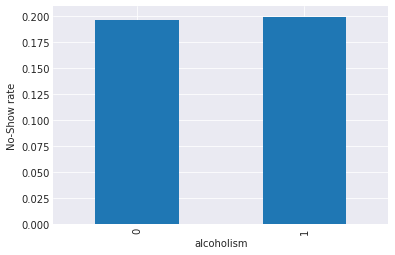

In [20]:
plot_simple('alcoholism')

Patients without alcoholism have nearly the same rate of no-showing as those with alcoholism. Next, we'll take a look at hypertension.

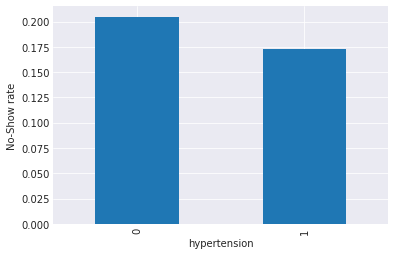

In [21]:
plot_simple('hypertension')

Unlike alcoholism, patients without hypertension have a noticeably higher no-show rate than patients with hypertension.  However, taking into consideration the scale of the y-axis, the difference is not a massive percentage. We'll now look at diabetes.

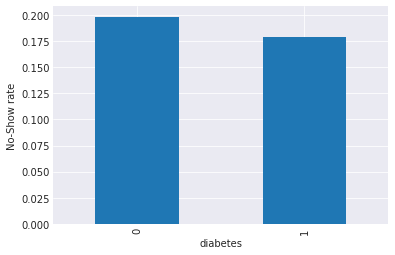

In [22]:
plot_simple('diabetes')

The diabetes plot looks more similar to hypertension than alcoholism: patients with diabetes have a lower no-show rate than their diabetic counterpart. 

For the last part of this question, we'll create some new dataframes that focus on the presence of each medical condition. Each dataframe will contain the rows where a given medical condition has a value of 1, indicating that the patient had that condition.  We'll also have a "control" dataframe where none of the patients have any medical condition.

In [23]:
df_none = df.query('hypertension == 0 and diabetes == 0 and alcoholism == 0') #make a dataframe for only patients 
                                                                                #with no conditions
    
df_hypertension = df.query('hypertension == 1') #make a dataframe for only patients with hypertension
df_diabetes = df.query('diabetes == 1') #make a dataframe for only patients with diabetes
df_alcoholism = df.query('alcoholism == 1') #make a dataframe for only patients with alcoholism

Now, we'll grab the means of "no_show" from each dataframe. We will assign these means to variables, each representing the rate at which patients with a given medical condition (or none at all) no-show to their appointments.

In [24]:
#to avoid needlessly long names, we'll use the first 3 letters of the medical condition and append it with _rate
non_rate = df_none['no_show'].mean()  #grab the rate of no-shows from patients with no medical conditions
hyp_rate = df_hypertension['no_show'].mean()  #grab the rate of no-shows from patients with hypertension
dia_rate = df_diabetes['no_show'].mean()  #grab the rate of no-shows from patients with diabetes
alc_rate = df_alcoholism['no_show'].mean()  #grab the rate of no-shows from patients with alcoholism

We can now use these variables as inputs to our other function defined earlier.

We'll plug in our no_show means and choose the appropriate label names to correspond with each mean:

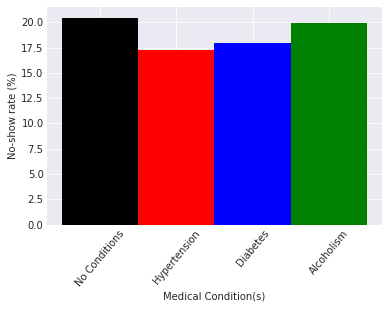

In [25]:
plot_bar(non_rate, hyp_rate, dia_rate, alc_rate, 'No Conditions','Hypertension','Diabetes','Alcoholism')

Our bar graph above reveals that although patients with alcholism have a higher rate of no-showing to their appointment than patients with diabetes and even moreso than patients with hypertension, the patients with no medical conditions actually have the highest rate of no-showing.  

From this visualization, we can conclude that from the dataset provided, patients with no medical conditions have the highest rate of no-showing to their appointment, followed by patients with alcoholism, patients with diabetes, and then patients with hypertension having the lowest no-show rate, or the highest attendance rate. This isn't to say that having no medical conditions will cause patients to no-show more frequently than patients with alcoholism, hypertension, or diabetes, but that this is simply what's represented by the dataset.

### For any given medical condition, does the patient having additional conditions on top of that lead to a significant change in the rate of no-showing to the appointment?

We'll now explore the relationships that medical conditions have with the rate of no-shows when medical conditions are layered on top of each other.  For example, when analyzing alcoholism, we'll be comparing the rate of no-shows between patients with only alchoholism, alcoholism with another medical condition, and alcoholism with both other medical conditions. 

We need to start by creating the necessary dataframes. I'll also be noting any overlaps so we don't create redundant frames.

We'll be creating a dataframe for patients with:
* only alcoholism
* only diabetes
* only hypertension
* alcoholism and diabetes (overlaps with diabetes/alcoholism)
* alcoholism and hypertension (overlaps with hypertension/alcoholism)
* diabetes and hypertension (overlaps with hypertension/diabetes)
* alcoholism, diabetes and hypertension (overlaps with any combo involving all three)

Before we create the dataframes, we can define a function that makes creating them less redundant:

In [26]:
def new_df(*conds):  
    '''the function will be used for creating a new dataframe for specific 
    combinations of the presence/lack of alcoholism, diabetes, and hypertension in patients'''
    query='alcoholism == 0 and hypertension == 0 and diabetes == 0' #default query
    if 'alcoholism' in conds:  
        query = query.replace('alcoholism == 0','alcoholism == 1') #if asked, will query patients with alocholism 
    if 'hypertension' in conds:
        query = query.replace('hypertension == 0','hypertension == 1') #if asked, will query patients with hypertension
    if 'diabetes' in conds:
        query = query.replace('diabetes == 0','diabetes == 1') #if asked, will query patients with diabetes
        
    return df.query(query)  #return the results to be assigned to a new dataframe.

Now that we've created our function, we'll go down the list from above and create each new dataframe. The dataframes with be named df_ and the first letter of the present medical conditions, alphabetically. For example, the patients with only alcoholism will be put into a dataframe named df_a

In [27]:
#create all necessary dataframes with the naming convention df_abbreviation
df_a = new_df('alcoholism')
df_d = new_df('diabetes')
df_h = new_df('hypertension')
df_ad = new_df('alcoholism','diabetes')
df_ah = new_df('alcoholism','hypertension')
df_dh = new_df('diabetes','hypertension')
df_adh = new_df('alcoholism','diabetes','hypertension')

We still need the means, or no-show rates for each dataframe. We'll calculate and assign the means in the next cell.

Our naming convention will be the abbreviation used by the dataframe, appended with _rate, similarly to what we did in the previous research question.

In [28]:
a_rate = df_a['no_show'].mean()
d_rate = df_d['no_show'].mean()
h_rate = df_h['no_show'].mean()
ad_rate = df_ad['no_show'].mean()
ah_rate = df_ah['no_show'].mean()
dh_rate = df_dh['no_show'].mean()
adh_rate = df_adh['no_show'].mean()

Now that we've created our dataframes and extracted the no-show rates , we can re-use our plotting function from before to compare the different combinations for each medical condition.

We'll start with alcoholism: patients with only alcoholism, alcoholism and another medical condition, and then all three conditions.

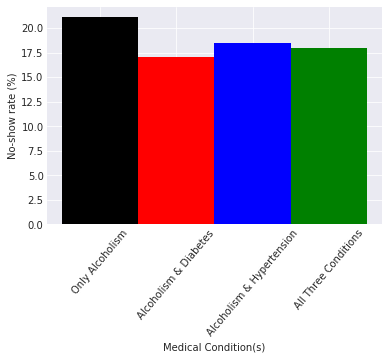

In [29]:
plot_bar(a_rate,ad_rate,ah_rate,adh_rate, #plot a bar graph using the alcoholism groups
         'Only Alcoholism','Alcoholism & Diabetes','Alcoholism & Hypertension','All Three Conditions')

The bar graph reveals that of the different groups of patients with alcoholism, patients with only alcoholism have the highest no-show rate to their appointment. Patients with alcoholism and diabetes have the lowest no-show rate. The difference in these rates, however, are extremely small; it is less than 5%.

Next, we'll take a look at the groups with diabetes.

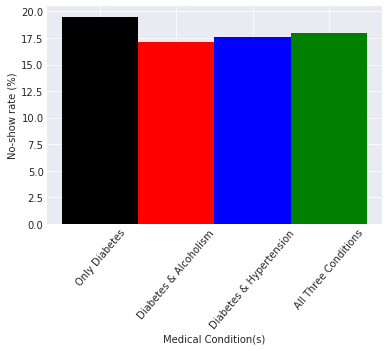

In [30]:
plot_bar(d_rate,ad_rate,dh_rate,adh_rate, #plot a bar graph using the hypertension groups
         'Only Diabetes','Diabetes & Alcoholism','Diabetes & Hypertension','All Three Conditions')

Much like alcoholism, the group of patients with only diabetes had the highest rate of no-showing to their appointment, but the difference among the groups is still not major by any means. 

Lastly, we'll be graphing the hypertension groups with the same bar graph function previously used.

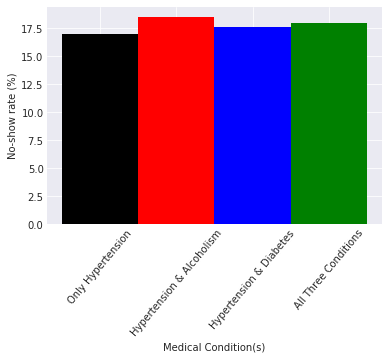

In [31]:
plot_bar(h_rate,ah_rate,dh_rate,adh_rate, #plot a bar graph using the hypertension groups
         'Only Hypertension','Hypertension & Alcoholism','Hypertension & Diabetes','All Three Conditions')

Unlike the last two bar graphs, the patient group with *only* the condition in question had the lowest rate of no-shows.  In this case, the group with Hypertension and Alcoholism, but not Diabetes, had the highest rate of no-shows.  However, similarly to what we've found in the previous groups, there is no significant difference in the rate of no-shows between any of the groups.



### Does having more medical conditions appear to correlate with a higher rate of no-shows from adult patients?

Our previous question viewed the relationship between medical conditions and no-show rates through several lenses that focused on one medical condition each. Now, we'll be looking at the no-show rates between groups of patients that have a certain number of any of the medical conditions, and see if the total number of conditions appears to have any correlation with the rate of no-shows.

We will now group patients by how many conditions they have. We'll need the following subsets of patients in separate dataframes:

* patients with no medical conditions
* patients with only one condition
* patients with two conditions
* patients with all three conditions

We have already made the first and last required dataframes and extracted the rate of no-shows when we answered our previous research questions, but may need to rename them for consistency. For the remaining required dataframes, we will merge our dataframes from research question # 2 and then assign their means to variables after.

In [32]:
#first, we'll make the missing dataframes by appending/concat'ing the old dataframes to each other.
df_one = pd.concat([df_a,df_d,df_h]) #combine the dataframes where patients only had one medical condition
df_two = pd.concat([df_ah,df_ad,df_dh]) #combine the dataframes where patients had two medical conditions

#df_none and df_three are not required since we already have the means/no-show rates from before.
 # we'll be reassigning new variable names for those values when we pull the means from our new dataframes.

Just to make sure no patient has been left behind through this process, let's grab the number of rows/entries from our main dataframes to ensure that no data has been left out.

In [33]:
df.count() == pd.concat([df_none,df_one,df_two,df_adh]).count() 

#this compares the number of entries for each column in our original dataframe (after cutting out underaged patients)
# with the total number of entries for each column across our separated groups of patients.  This should return "True"
# for all columns.


hypertension    True
diabetes        True
alcoholism      True
no_show         True
dtype: bool

Now that we've created our dataframes and verified that all patients have been separated and grouped correctly, we will grab the means of the no-show column in our new dataframes and assign a more consistently-named variable for the means calculated in previous sections.

In [34]:
#for ease of interpretation, we want the means/no-show rates to be 
# named using the format rate_#, where # is the number of medical conditions.

rate_0 = non_rate  #we've already calculated the rate of no-shows from patients with no med. conditions, so we just reassign.
rate_1 = df_one['no_show'].mean() #calculate and assign the rate of no-shows from patients with only one med. condition.
rate_2 = df_two['no_show'].mean() #calculate and assign the rate of no-shows from patients with exactly two med. conditions.
rate_3 = adh_rate #we've already calculated the rate of no-shows from patients with all three med. conditions.

Now that we have the rates of no-shows organized by how many medical conditions the patients have, we can place the values on a line plot to see if there's any clear incline or decline, suggesting some sort of relationship between the number of medical conditions a patient has and the likelihood that they will no-show to their appointment.

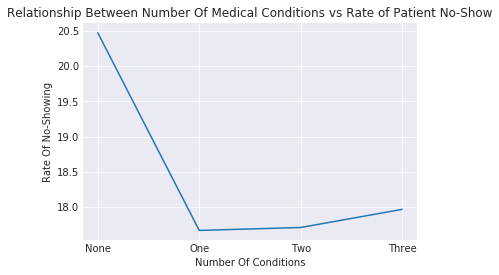

In [35]:
#plot a simple lineplot using the rates created above.
# this is the only time we'll be using this type of plot, so we'll code 
# it out in this cell rather than defining a whole function for it.

x = [1, 2, 3, 4]
y = [rate_0*100, rate_1*100, rate_2*100, rate_3*100]
plt.xticks(x,['None','One','Two','Three'])
plt.xlabel('Number Of Conditions')
plt.ylabel('Rate Of No-Showing')
plt.title('Relationship Between Number Of Medical Conditions vs Rate of Patient No-Show')
plt.plot(x,y)

Our graph shows that although the rate at which patients no-show to their appointment decreases if they have one medical condition instead of none, this trend does not continue as the number of medical conditions increases.

Patients with no medical conditions have the highest rate of no-showing to their appointment, and patients with one medical condition have the lowest rate of no-showing to their appointment, but even this difference appears to be very insignificant: less than 3% according to the visualization.

<a id='conclusions'></a>
## Conclusions

To summarize our findings, it appears that having any single, combination, or lack of the medical conditions alcoholism, hypertension, and/or diabetes is not a reliable way to predict whether or not a patient will no-show to their appointment, as there is no significant difference in the rate of no-shows between the different groups of patients, nor is there a strong correlation between the number of medical conditions patients have and the rate at which those patients no-showed to their appointment. This conclusion is only based off the data provided, and is not representative of the no-show rates of appointments outside of the dataset.

### Limitation

One clear limitation when exploring our research questions was that we were only provided three medical conditions to work with: alcoholism, diabetes, and hypertension.  Although we can claim that having any single or combination of these medical conditions does not correlate with a higher rate of no-shows, it's difficult to conclude that no amount of medical conditions will have an impact on the rate of no-shows, or that no unlisted medical condition could single-handedly lead to a higher rate of no-shows by afflicted patients.  Had the study collected data on a wider variety of debilitating medical conditions, our findings may have been vastly different.